In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


# 1D Random Walk

In [15]:
N = 10**4
steps = 2*np.random.randint(0,high = 2,size = N) -1

In [16]:
position=np.cumsum(steps)
position

array([  1,   0,   1, ..., 144, 143, 144])

In [17]:
print(f'Maximum distance = {position.max()} at {position.argmax()}th step')
print(f'Minimum distance = {position.min()} at {position.argmin()}th step')

Maximum distance = 149 at 9938th step
Minimum distance = -8 at 77th step


In [18]:
print(f' x = 20 reached at steps {np.where(position == 20)}')

 x = 20 reached at steps (array([581, 585, 587, 615, 629, 635, 637, 641, 643, 647, 649, 651, 653,
       745, 747, 755, 757, 761, 775, 781, 815, 817, 825, 839, 841, 843,
       845, 849, 855, 857, 859, 861, 863, 869, 871, 875, 877]),)


In [19]:
index=np.asarray(np.linspace(0,N,N))

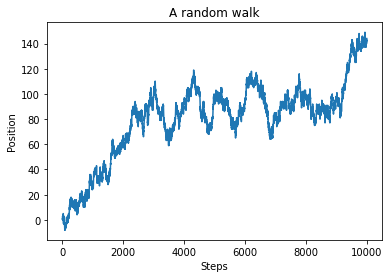

In [21]:
plt.title('A random walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(position)
plt.show()

In [23]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(1.1*position.min(),1.1*position.max()))
ax.grid()
ax.set_xlabel('Steps')
ax.set_ylabel("Position")
plt.title('Animated Random Walk')

line = ax.plot(index[0], position[0], '-', lw=0.5)
def update_plots(i):
    # Draw the i-th position
    line[0].set_data(index[:i], position[:i])
    # Return a tuple
    return line[0],

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(position)), interval=1, blit=True, repeat=True)
plt.show()

<IPython.core.display.Javascript object>

# Statistics on 1D Random Walk

In [24]:
N = 10**3
steps = 2*np.random.randint(0,high = 2,size = (N,N)) -1
steps.shape

(1000, 1000)

In [25]:
positions=np.cumsum(steps,axis=1)
positions.shape

(1000, 1000)

In [26]:
max=(positions.max(axis=1)).max()
print(f'The final position of the {(positions.max(axis=1)).argmax()}-th walker is {max}')

The final position of the 665-th walker is 98


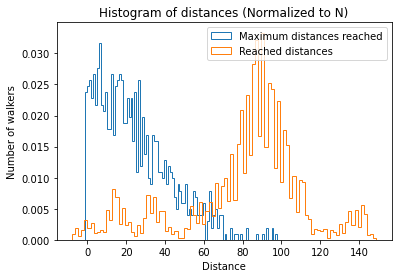

In [44]:
%matplotlib inline

n, bins, patches = plt.hist(positions.max(axis=1),bins=max,histtype = 'step', density = True, label = 'Maximum distances reached' )

n, bins, patches = plt.hist(position.flatten(),bins=max,histtype = 'step', density = True, label = 'Reached distances')

plt.xlabel('Distance')
plt.ylabel('Number of walkers')
plt.title('Histogram of distances (Normalized to N)')
plt.legend()
plt.show()

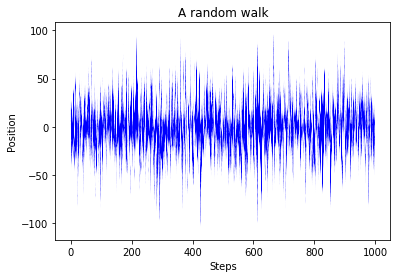

In [69]:
plt.title('A random walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(positions, lw = 0.012,alpha = 0.08, color = 'blue')
plt.show()

<IPython.core.display.Javascript object>


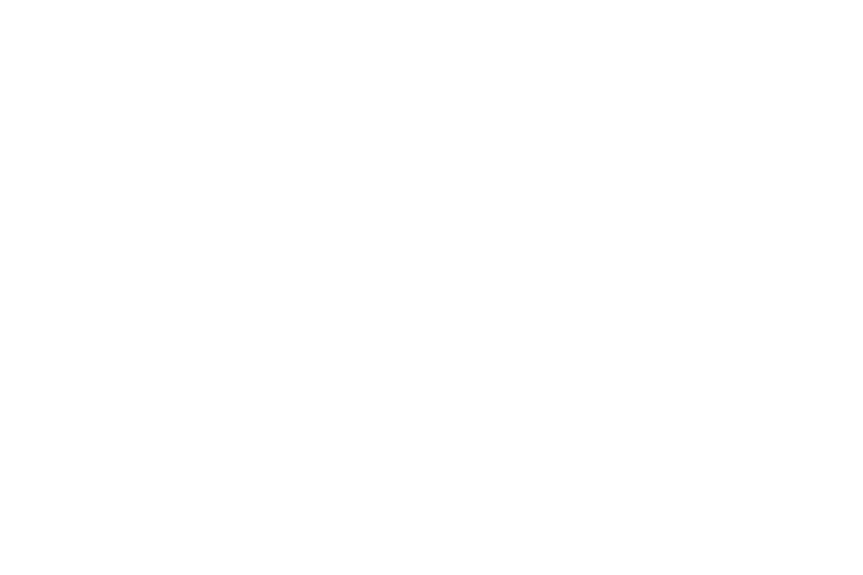

ValueError: x and y must have same first dimension, but have shapes (1,) and (1000,)

<IPython.core.display.Javascript object>


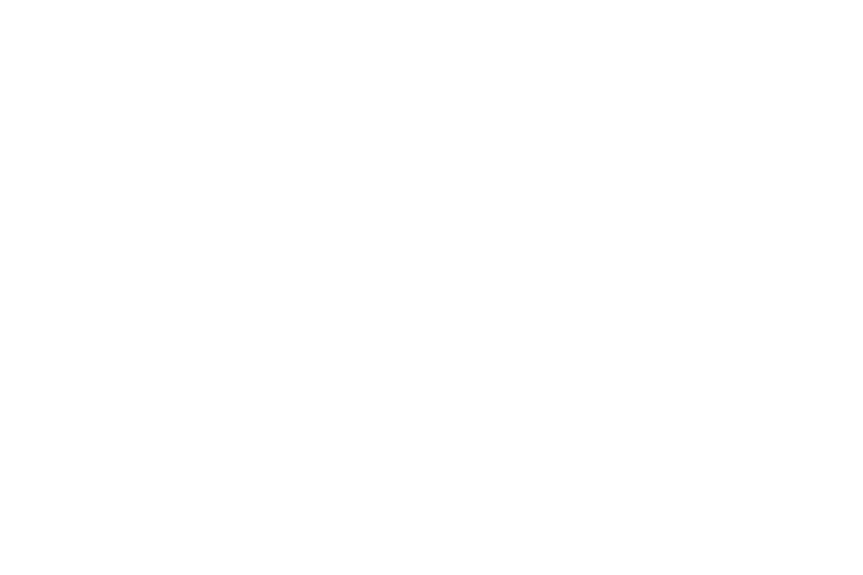

In [75]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(1.1*positions.min(),1.1*positions.max()))
ax.grid()
ax.set_xlabel('Steps')
ax.set_ylabel("Positions")
plt.title('Animated Random Walk')

line = ax.plot(0, positions[:,0], '-', lw=0.5)
def update_plots(i):
    # Draw the i-th position
    line[0].set_data(i, positions[:,:i])
    # Return a tuple
    return line[0],

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, N), interval=1, blit=True, repeat=True)
plt.show()